# Eye vs. Nose

Ejemplo básico de CNN en la que se reconocen imágenes de 32x32 pixeles que contienen una nariz o un ojo (de la base de datos AR). Este es quizás uno de los ejemplos más simples para entrenar una CNN ya que la diferencia existente entre las clases es enorme, y su entrenamiento es muy rápido y efectivo. Se presenta sólo con fines pedagógicos. Se recomienda entender y probar esta red antes probar problemas de mayor complejidad.

In [1]:
!unzip -qq eyenose.zip

--2023-09-25 14:36:13--  https://www.dropbox.com/s/nfp7py0310zajeu/eyenose.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nfp7py0310zajeu/eyenose.zip [following]
--2023-09-25 14:36:14--  https://www.dropbox.com/s/raw/nfp7py0310zajeu/eyenose.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc32848d4b41461b327ff2c4a778.dl.dropboxusercontent.com/cd/0/inline/CEbtcycTJdq_9YZwVzrNkimKaTv6yKNfsdGwvKKj-gnXyKSa-xqs53VRzvSjMzj6BaG6T62Z8oRAzeeBPfAix03IKJWkgO7OKyJKyWdsKBEon3-rTJSioy5IW6uU1M2XCZ0/file# [following]
--2023-09-25 14:36:14--  https://uc32848d4b41461b327ff2c4a778.dl.dropboxusercontent.com/cd/0/inline/CEbtcycTJdq_9YZwVzrNkimKaTv6yKNfsdGwvKKj-gnXyKSa-xqs53VRzvSjMzj6BaG6T62Z8oRAzeeBPfAix03IKJWkgO7OKyJKyWdsKBEon3-rTJSioy5IW6uU1M

In [2]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory
train_dir = "eyenose/train"
test_dir  = "eyenose/test"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

# Se trabaja en cubos para las convoluciones

Size image: torch.Size([3, 32, 32])
   Classes:  ['eye', 'nose']


In [3]:
!wget https://www.dropbox.com/s/3wecoj4ytgnl5oi/cnn_utils_01.py
from cnn_utils_01 import display_img,show_batch,plot_accuracies,plot_losses,print_confusion
from cnn_utils_01 import fit,ImageClassificationBase,nn
from cnn_utils_01 import load_model,get_labels,get_prediction,performance
print('cnn_utils module has been loaded')

--2023-09-25 14:37:39--  https://www.dropbox.com/s/3wecoj4ytgnl5oi/cnn_utils_01.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3wecoj4ytgnl5oi/cnn_utils_01.py [following]
--2023-09-25 14:37:40--  https://www.dropbox.com/s/raw/3wecoj4ytgnl5oi/cnn_utils_01.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8c7fe9cda931433b80bd0ca1b.dl.dropboxusercontent.com/cd/0/inline/CEadHD-9VcCcrN0LEfF0ywBoMCz9rZ4WwX8rYjtQP0QFRJrMWHhva2jcvhzpaav7_kSSrO5v8-3PpMn_8jZdy0JvuIK6So1vUtS6CsyC7yms8qU51L5PjX_QWissrkON1-k/file# [following]
--2023-09-25 14:37:40--  https://ucb8c7fe9cda931433b80bd0ca1b.dl.dropboxusercontent.com/cd/0/inline/CEadHD-9VcCcrN0LEfF0ywBoMCz9rZ4WwX8rYjtQP0QFRJrMWHhva2jcvhzpaav7_kSSrO5v8-3PpMn_8jZdy0JvuIK6So1vUtS6CsyC7yms8qU51L

Image: 155, Label : eye


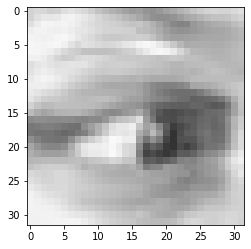

In [ ]:
#display an image in the training dataset
display_img(train_set,155)

In [ ]:
batch_size = 40
val_size   = 960
train_size = len(train_set) - val_size

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data      : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_data, 2*batch_size, num_workers = 2, pin_memory = True)

Length of Train Data      : 7360
Length of Validation Data : 960


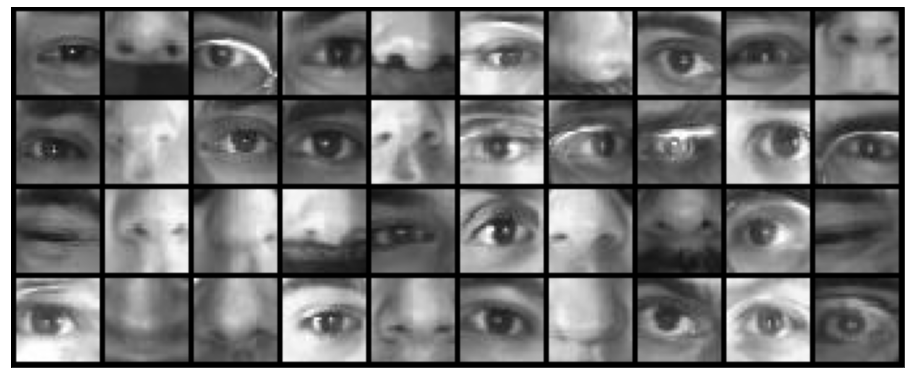

In [ ]:
show_batch(train_dl,nrow=10)

In [ ]:
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(in_channels=3, out_channels=4, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size = 5, stride = 6, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(32,2)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(6, 6))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         =  0.005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.4356      0.2971      0.9000    ***       2.7 
    1      0.1949      0.1742      0.9469    ***       2.6 
    2      0.1620      0.1717      0.9417              2.6 
    3      0.1350      0.1610      0.9396              2.6 
    4      0.1218      0.1203      0.9615    ***       2.5 
    5      0.1084      0.1190      0.9625    ***       2.5 
    6      0.1100      0.1423      0.9562              2.6 
    7      0.1087      0.1181      0.9646    ***       2.6 
    8      0.0932      0.1135      0.9667    ***       2.6 
    9      0.0947      0.1124      0.9677    ***       2.6 
   10      0.0881      0.1168      0.9677              2.6 
   11      0.0988      0.1101      0.9615              2.6 
   12      0.0928      0.1320      0.9656              2.5 
   13      0.0907      0.1206      0.9573              2.6 
   14      0.0826      0.1074 

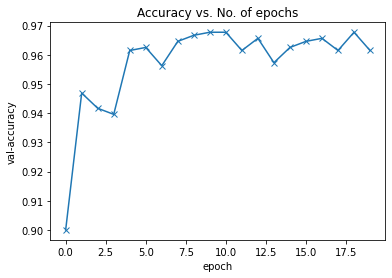

In [ ]:
plot_accuracies(history)

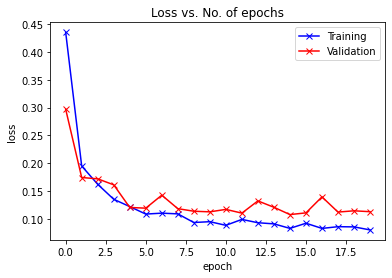

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.975
 
Confusion Matrix = 
[[1012   28]
 [  24 1016]]


Confusion Matrix:
[[ 994   46]
 [   6 1034]]
Accuracy = 97.50


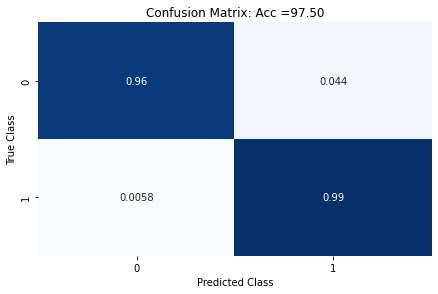

In [ ]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1040)

In [ ]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data  ,'Validation')
C3,acc3 = performance(model,test_set  ,'Testing')

Training Confusion Matrix = 
[[3586  103]
 [  96 3575]]
 
Training Accuracy = 0.9730
 
Validation Confusion Matrix = 
[[452  19]
 [ 12 477]]
 
Validation Accuracy = 0.9677
 
Testing Confusion Matrix = 
[[ 994   46]
 [   6 1034]]
 
Testing Accuracy = 0.9750
 
